<a href="https://colab.research.google.com/github/albert-h-wong/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [40]:
# Check for initial descriptive stats on the DF variables

df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,mileage_squared,year_squared,year_sqroot
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8.495000e+03,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868,9.187154,29589.544085,4.026094e+06,44.793916
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235,0.961828,45443.957337,2.772353e+04,0.077407
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000,5.558179,0.000000,3.837681e+06,44.260592
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000,8.610684,5476.000000,4.016016e+06,44.766059
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000,9.159047,16900.000000,4.032064e+06,44.810713
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000,9.749493,38809.000000,4.044121e+06,44.844175
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000,13.213666,998001.000000,4.064256e+06,44.899889


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
# Divided df into an X matrix of variables and the y vector price

y = df['price']
X = df.drop(['price'], axis=1)


## 1.2 Split the data into test and train datasets using train_test_split

In [9]:
# Split the data into test and train and printed data shapes for reference

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8495, 8) 

(4247, 8)
(4248, 8)
(4247,)
(4248,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [10]:
# Used scikit-learn to run and fit a multiple regression on the training data

MRmodel = LinearRegression()
MRmodel.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [11]:
# Calculated and printed the intercept and coefficient values from the model

print("Coefficient: \n", MRmodel.coef_)
print("\n Intercept: ", MRmodel.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

 Intercept:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
# Created test data for predictions

y_test_predict = MRmodel.predict(X_test)



## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [13]:
# Calculated and reported RMSE and R^2

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 504905647.2241802
RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The value price of the used car increases by ~$1,098 with each incremental newer year (more recent year). Directionally this is expected as the value of newer cars relative to older cars typically depreciates less. 

## 1.8 How should we interpret the Root-Mean-Square Error?

A root mean square error of 22,470 can be interpreted as the model's error in explaining the price of a car based on the regression model of selected X variables. It indicates that our model prediction can be off by 22,470 which is a large error rate considering the range of price values in the data.

## 1.9 How should we interpret the $R^2$?

An $R^2$ of 0.2694 can be interpreted as 26.9% of the used car price can be explained by all the selected X variables in our multiple regression model. This is quite low and it indicates we should look to investigate further and apply other techniques to tune the model to fit features that can better explain the relationship between the price and the car characteristics. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
# Created a log of the price variable

df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

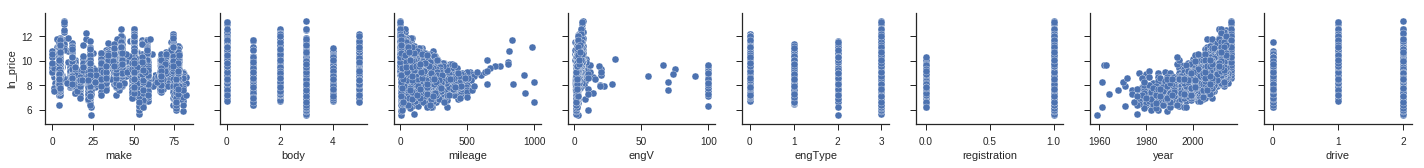

In [16]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['ln_price','price'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# Checking to see if mileage and year could be helpful new polynomial features based on initial scouting of pairplot

df['mileage_squared'] = df['mileage']**2
df['year_squared'] = df['year']**2

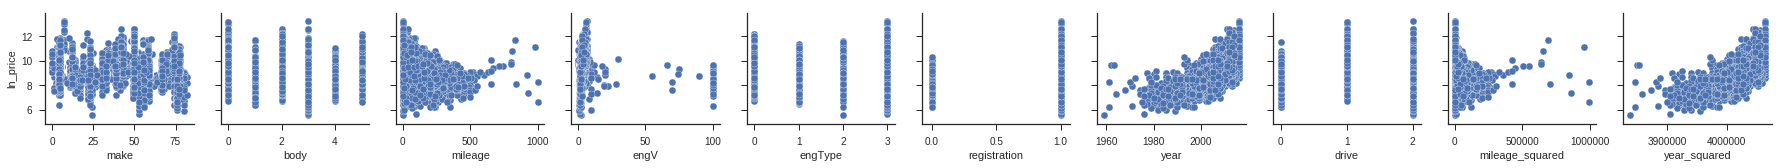

In [19]:
# Not significant differences detected visually from squaring the selected variables

x_columns2 = df.columns.drop(['ln_price','price'])
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns2)

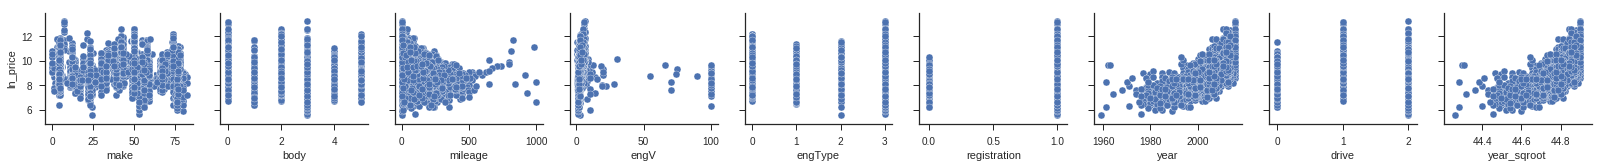

In [21]:
# Checked to see if square rooting year shows any effect but it does not

df['year_sqroot'] = df['year']**0.5
x_columns3 = df.columns.drop(['ln_price','price','year_squared','mileage_squared'])
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns3)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [23]:
x_columns2

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'mileage_squared', 'year_squared'],
      dtype='object')

In [0]:
# Decided to use the log transformed price variable for y and added year squared feature for X variables

y2 = df.loc[:, ['ln_price']].values
X2 = df.loc[:, ['make','body','mileage','engV','engType', 'registration','year','drive','year_squared']].values

In [30]:
# Split into train and test

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=.5, random_state=42)

print(X2.shape, "\n")

print(X_train2.shape)
print(X_test2.shape)
print(Y_train2.shape)
print(Y_test2.shape)


(8495, 9) 

(4247, 9)
(4248, 9)
(4247, 1)
(4248, 1)


In [31]:
# Ran a linear regression model

PRmodel = LinearRegression()
PRmodel.fit(X_train2, Y_train2)
print("Coefficient: \n", PRmodel.coef_)
print("\n Intercept: ", PRmodel.intercept_)


Coefficient: 
 [[-1.61546879e-03 -8.56238008e-02  6.80416242e-04  9.64573698e-03
  -4.93594088e-02  6.70762698e-01 -6.19087737e+00  3.82779837e-01
   1.57155448e-03]]

 Intercept:  [6103.33282126]


In [0]:
y_test_predict2 = PRmodel.predict(X_test2)

In [33]:
# Adding the year squared variable and log transformation of price improved the
# fit of the regression dramatically from R^2 of 0.27 to 0.67

MSE = mean_squared_error(Y_test2, y_test_predict2)

RMSE = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test2, y_test_predict2)

print('R^2 is {}'.format(R2))

MSE is 0.30840748485851827
RMSE is 0.5553444740505826
R^2 is 0.6724141552316434


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The price of the used car increases by 0.157% for each incremental newer year (more recent year). This is a bit lower than expected but is in the right direction as we would expect newer cars have values that have depreciated less than a comparable older car. The lower than expected coefficient could be caused by the impact on a number of different cars due to car condition, brand, mileage, and car features that also impact the price.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent typically seeks to find parameters that minimize a cost function (error rate) in a model. It takes an iterative approach to find an optimal minimum value in a cost function to achieve a prediction in a model (or hypothesis line) that is closest to the actual target value. Gradient descent seeks to make self adjusting (depending on inputs) incremental steps measuring the slope of a cost function until it reaches or converges towards a 0 slope indicating the minimum (optimal value). The relative performance and effectiveness of the gradient descent technique is driven by a combination of the learning rate, number of iterations, and the initial constant chosen for the process.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate in the gradient descent equation is typically represented by the alpha symbol and is multiplied by the gradient or slope of the equation. The function of the learning rate is to optimize the incremental steps taken in measuring the slope in the convergence process. A small learning rate may potentially move too slowly and requires too many iterations to reach the minimum point which can be a performance or computational issue or constraint to be considered. However a large learning rate can overshoot and cause drastic updates that lead to divergent behaviors that also decreases the performance of the technique (not reaching minimum value, finding a local but not global minimum or taking many more iterations). Hyper tuning parameters can optimize the learning rate to efficiently and effectively reach the minimum value in gradient descent. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [34]:
# Ran regression using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-polynomial Regression

X3 = df[['make','body','mileage','engV','engType', 'registration','year','drive','year_squared']] 

y3 = df['ln_price']

# Add a vector of ones
X3 = sm.add_constant(X3)

model = sm.OLS(y3, X3).fit(cov_type='HC3')
predictions = model.predict(X3) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:25:32   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [36]:
# Calculated the VIF of the X variables

print(X3.columns, '\n\n')

vif = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_squared'],
      dtype='object') 


[2953273039.000897, 1.060431475161977, 1.1583527741914774, 1.9368892032947695, 1.0100376419582973, 1.1547598212322845, 1.1085146982201888, 141693.16571434424, 1.1396338223459779, 141937.91485709895]


Yes any VIF > 10 is an indication of multicollinearity problems and the year and year squared variables is an issue to correct because it make increase the standard errors of the variable.

In [37]:
# Check correlation to support the collinearity finding of the year variables

no_const = X3.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive,year_squared
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,-0.013679
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,-0.154919
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,-0.504345
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,-0.041024
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,-0.040323
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,0.185613
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,0.999995
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,-0.169444
year_squared,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,0.999995,-0.169444,1.000000
